# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import sklearn
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
warnings.filterwarnings('ignore')

C:\Users\Kirti\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ModuleNotFoundError: No module named 'mlxtend'

In [19]:

#read the csv
df_train_original = pd.read_csv('C:/Users/Kirti/Downloads/archive (2)/train.csv')
df_test_original = pd.read_csv('C:/Users/Kirti/Downloads/archive (2)/train.csv')


In [20]:
df_train_original.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [21]:
df_test_original.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [22]:
print("Number of rows in training dataset: ", df_train_original.shape[0])
print("Number of columns in training dataset: ", df_train_original.shape[1])


Number of rows in training dataset:  45211
Number of columns in training dataset:  17


In [23]:
df_test_original.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [24]:
print("Number of rows in test dataset: ", df_test_original.shape[0])
print("Number of columns in test dataset: ", df_test_original.shape[1])

Number of rows in test dataset:  45211
Number of columns in test dataset:  17


In [25]:
df_train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [26]:
df_train_original.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [27]:
numerical_columns = df_train_original.select_dtypes("int64").columns
categorical_columns = df_train_original.select_dtypes("object").columns
numerical_columns = list(numerical_columns)
categorical_columns= list(categorical_columns)

print("Numerical Columns", numerical_columns)
print("Categorical Columns", categorical_columns)

Numerical Columns ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical Columns ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [28]:
unique = set(list(df_train_original.dtypes))
unique

{dtype('int64'), dtype('O')}

In [29]:
df_train_original.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

C:\Users\Kirti\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Kirti\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Kirti\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\Kirti\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and

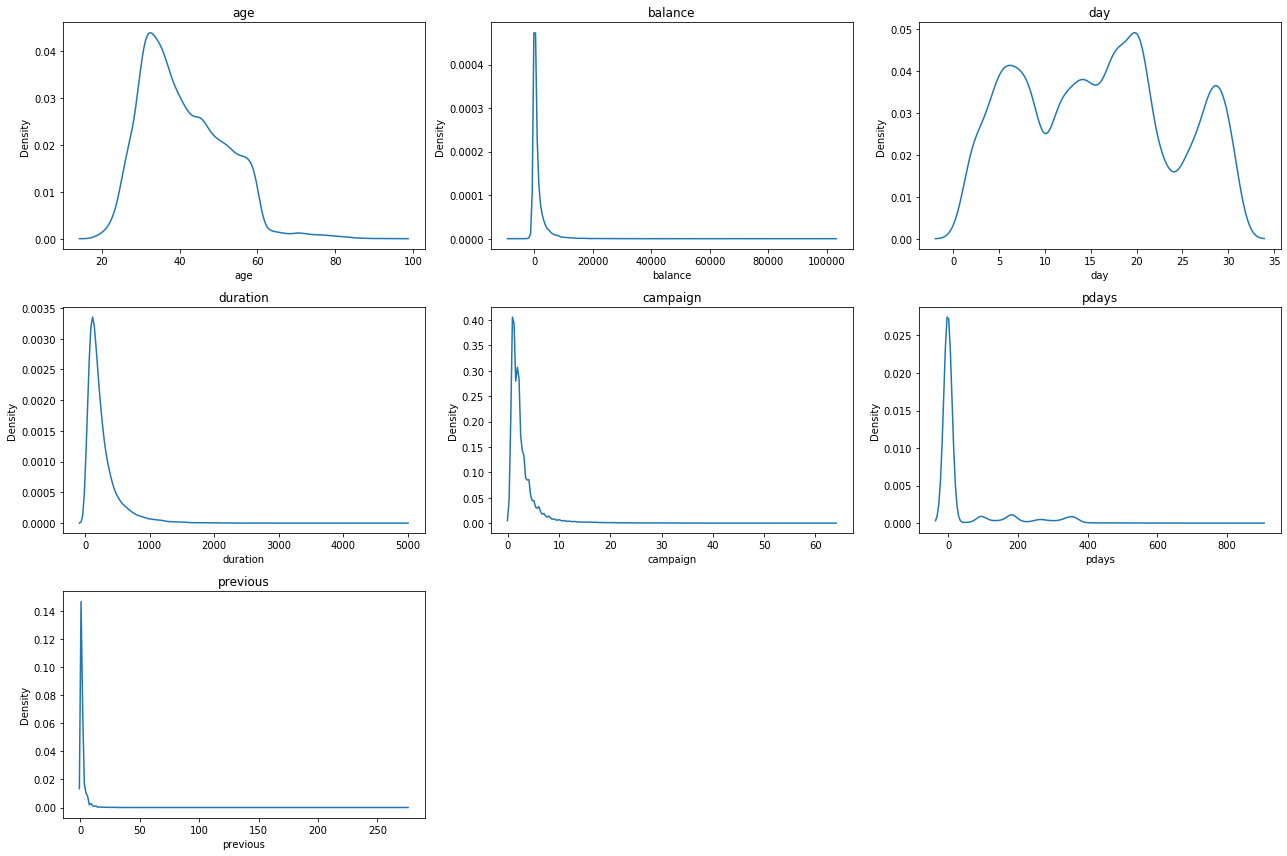

In [30]:
#extract numerical features from dataset
numeric_features = df_train_original.select_dtypes('int64').columns

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Plot KDE for each numeric feature in the grid
for i, numeric_feature in enumerate(numeric_features):
    sns.kdeplot(data=df_train_original[numeric_feature], ax=axes[i])
    axes[i].set_title(numeric_feature)

for j in range(i+1, len(axes)):
  axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

Examining data distributions using QQ plots

Points on the Normal QQ plot provide an indication of univariate normality of the dataset. If the data is normally distributed, the points will fall on the 45-degree reference line. If the data is not normally distributed, the points will deviate from the reference line

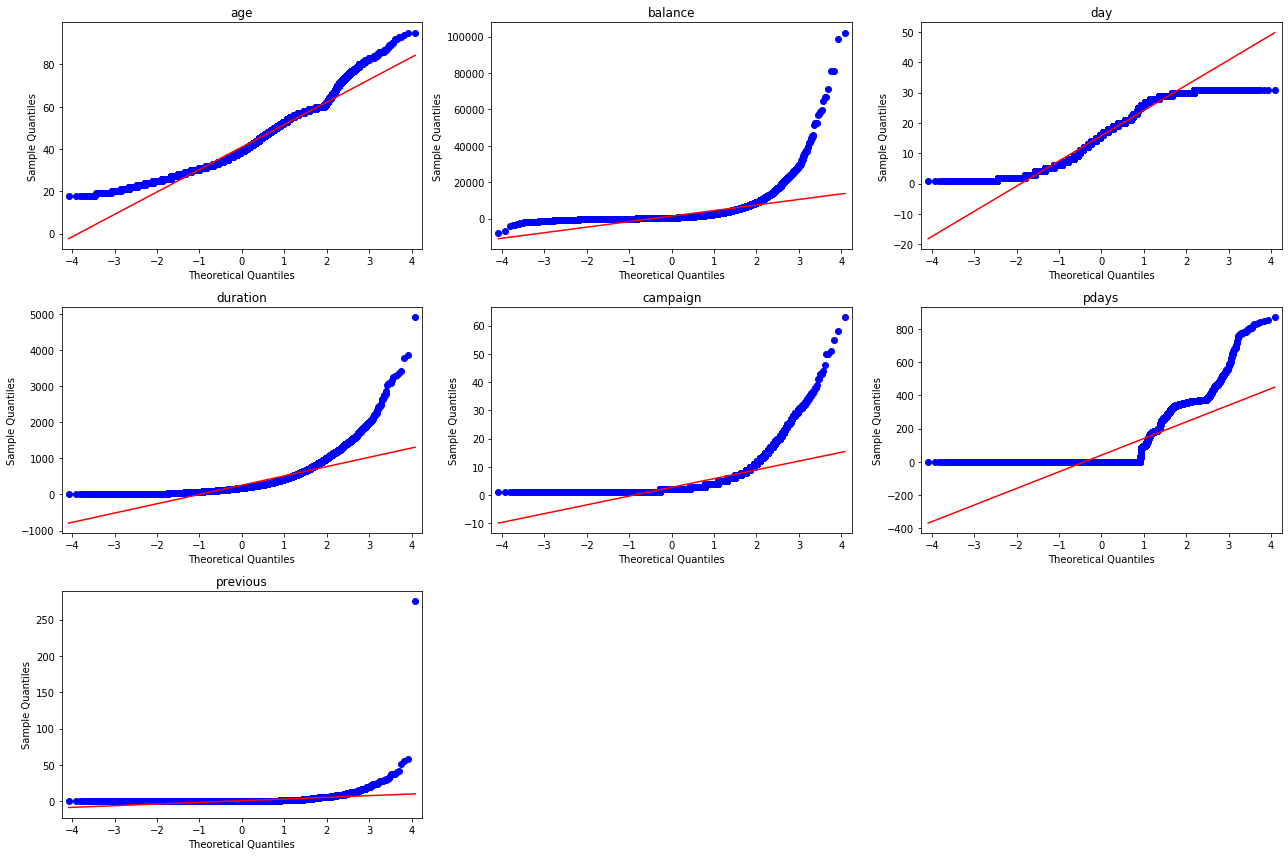

In [31]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Plot Q-Q plot for each numeric feature in the grid
for i, numeric_feature in enumerate(numeric_features):
  sm.qqplot(df_train_original[numeric_feature], line='s', ax=axes[i])
  axes[i].set_title(numeric_feature)

for j in range(i+1, len(axes)):
  axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

# Observation

*   Age, Previous -  Light tailed
*   Balance, Campaign, Duration - right skewed
*   Day, Pdays - Bi modal
*   Balance - right skewed

# Step 3: Feature Selection

independent variables are useful to predict a target (dependent variable)

In [32]:
#Encoded categorial using label encoder technique
label_encoder = LabelEncoder()
df_train = df_train_original.copy()
df_test = df_test_original.copy()

categorical_features = df_train.select_dtypes('object').columns
for feature in categorical_features:
  df_train[feature] = label_encoder.fit_transform(df_train[feature])


categorical_features = df_test.select_dtypes('object').columns
for feature in categorical_features:
  df_test[feature] = label_encoder.fit_transform(df_test[feature])

In [33]:
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [34]:
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [35]:
#extract independent variables
X_train =  df_train.drop('y', axis=1)
#extract target variable
y_train = df_train['y']


X_test =  df_test.drop('y', axis=1)
#extract target variable
y_test = df_test['y']

In [36]:
X_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [37]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [38]:
X_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [39]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [40]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

# Feature Scaling

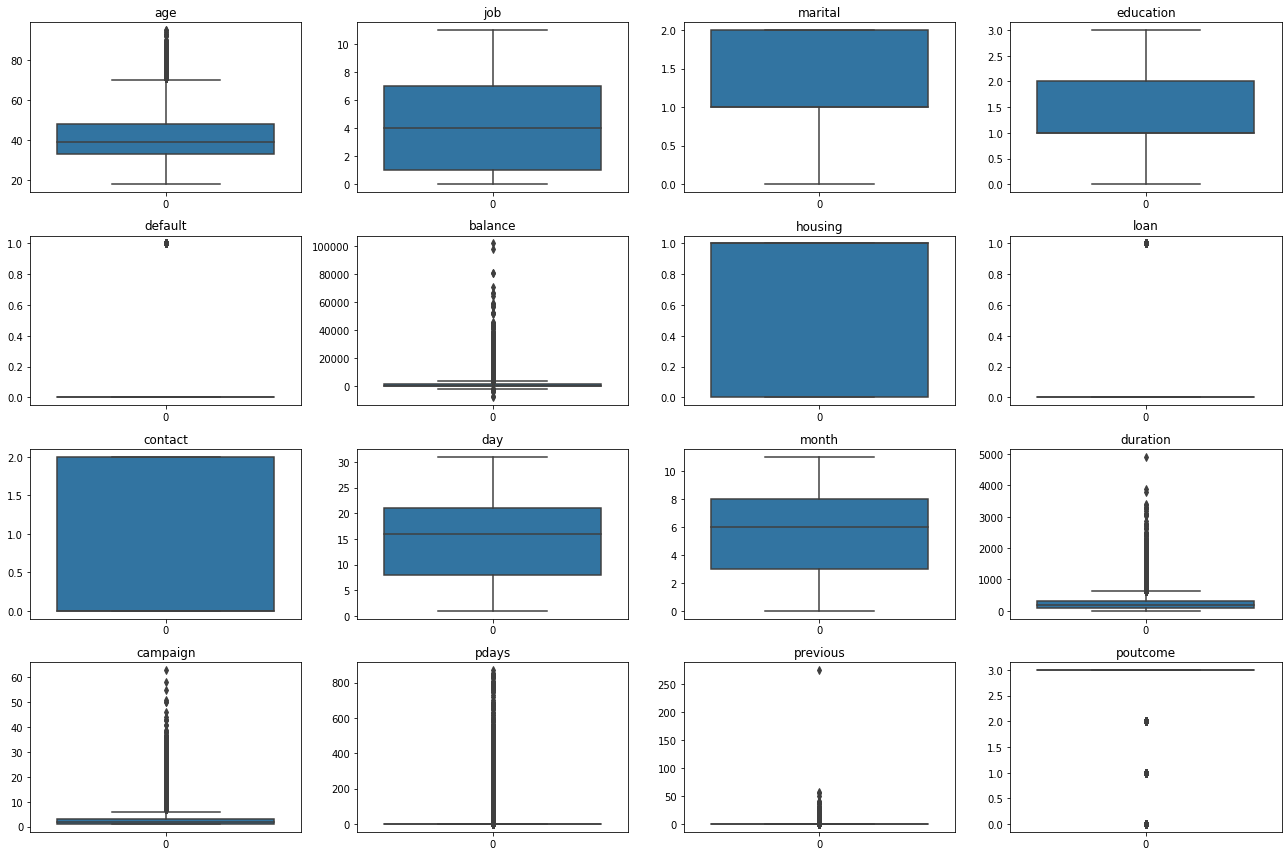

In [41]:
#extract columns from dataset
features = X_train.columns

fig, axes = plt.subplots(4, 4, figsize=(18, 12))
axes = axes.flatten()

# Plot box plot for each feature in the grid
for i, feature in enumerate(features):
    sns.boxplot(data=X_train[feature], ax=axes[i])
    axes[i].set_title(feature)

for j in range(i+1, len(axes)):
  axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [42]:
from sklearn import preprocessing

# Preparing for normalizing
X_train_scaled = X_train
X_test_scaled = X_test
min_max_scaler = preprocessing.MinMaxScaler()
X_train_columns = list(X_train.columns)
X_test_columns = list(X_test.columns)
# # Run the normalizer on the dataframe
X_train_scaled[X_train_columns] = min_max_scaler.fit_transform(X_train[X_train_columns])
X_test_scaled[X_test_columns]= pd.DataFrame(min_max_scaler.fit_transform(X_test[X_test_columns]))

In [43]:
X_train_scaled.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.519481,0.363636,0.5,0.666667,0.0,0.092259,1.0,0.0,1.0,0.133333,0.727273,0.053070,0.0,0.0,0.0,1.0
1,0.337662,0.818182,1.0,0.333333,0.0,0.073067,1.0,0.0,1.0,0.133333,0.727273,0.030704,0.0,0.0,0.0,1.0
2,0.194805,0.181818,0.5,0.333333,0.0,0.072822,1.0,1.0,1.0,0.133333,0.727273,0.015453,0.0,0.0,0.0,1.0
3,0.376623,0.090909,0.5,1.000000,0.0,0.086476,1.0,0.0,1.0,0.133333,0.727273,0.018707,0.0,0.0,0.0,1.0
4,0.194805,1.000000,1.0,1.000000,0.0,0.072812,0.0,0.0,1.0,0.133333,0.727273,0.040260,0.0,0.0,0.0,1.0


In [44]:
X_test_scaled.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.519481,0.363636,0.5,0.666667,0.0,0.092259,1.0,0.0,1.0,0.133333,0.727273,0.053070,0.0,0.0,0.0,1.0
1,0.337662,0.818182,1.0,0.333333,0.0,0.073067,1.0,0.0,1.0,0.133333,0.727273,0.030704,0.0,0.0,0.0,1.0
2,0.194805,0.181818,0.5,0.333333,0.0,0.072822,1.0,1.0,1.0,0.133333,0.727273,0.015453,0.0,0.0,0.0,1.0
3,0.376623,0.090909,0.5,1.000000,0.0,0.086476,1.0,0.0,1.0,0.133333,0.727273,0.018707,0.0,0.0,0.0,1.0
4,0.194805,1.000000,1.0,1.000000,0.0,0.072812,0.0,0.0,1.0,0.133333,0.727273,0.040260,0.0,0.0,0.0,1.0


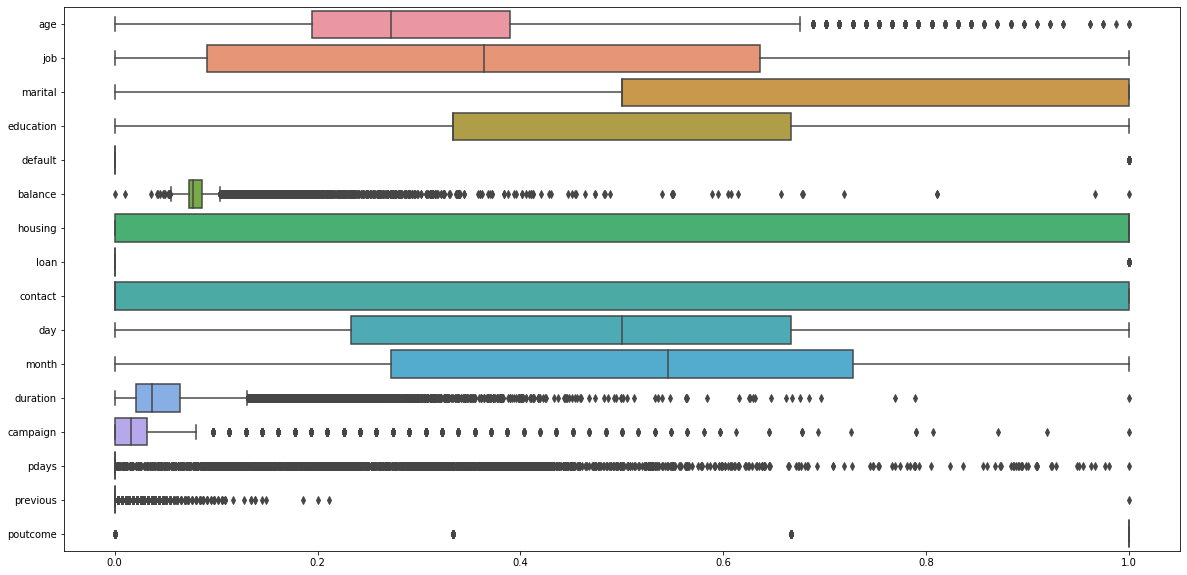

In [45]:
plt.figure(figsize=(20, 10))  # Adjust the height as needed
sns.boxplot(data=X_train_scaled, orient="h")
plt.show()

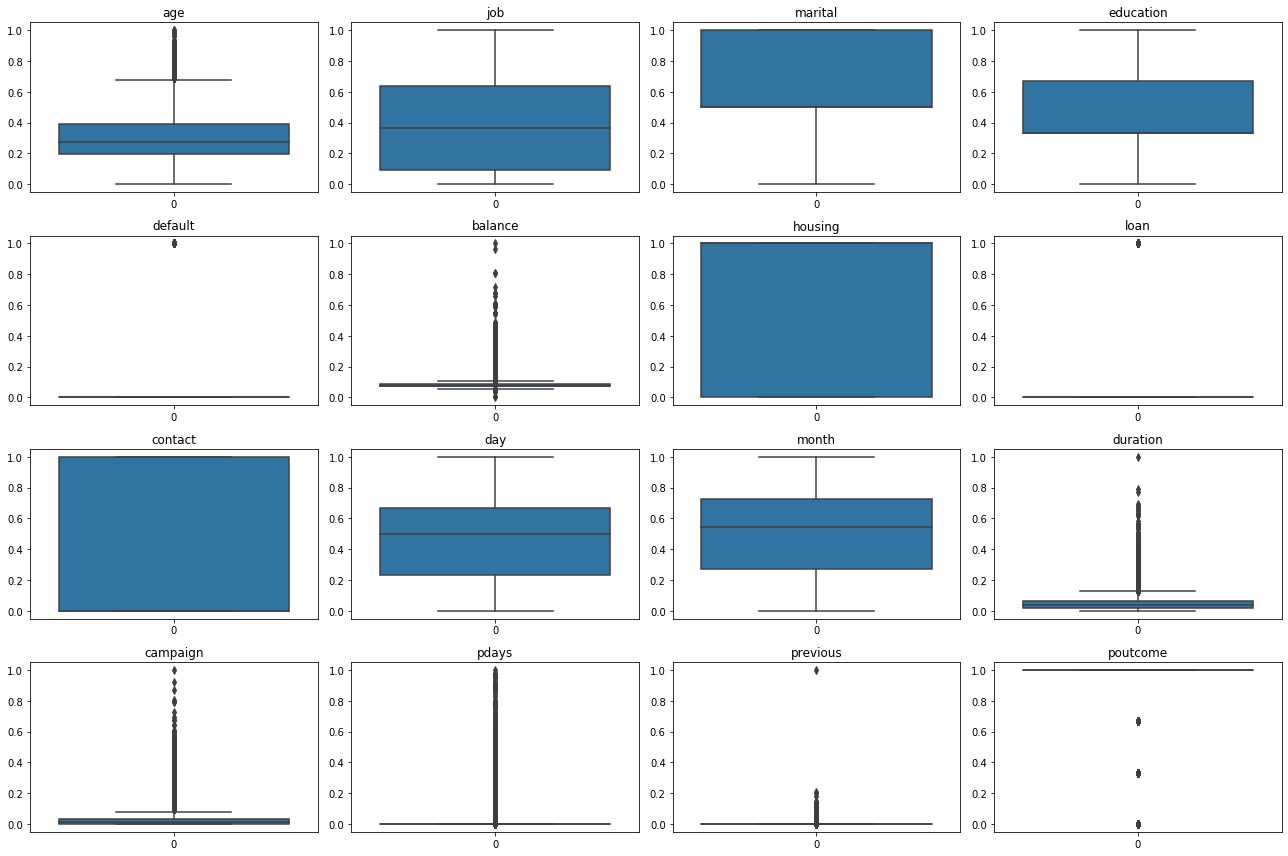

In [46]:
#extract columns from dataset
features = X_train_scaled.columns

fig, axes = plt.subplots(4, 4, figsize=(18, 12))
axes = axes.flatten()

#Plot box plot for each feature in the grid
for i, feature in enumerate(features):
    sns.boxplot(data=X_train_scaled[feature], ax=axes[i])
    axes[i].set_title(feature)

for j in range(i+1, len(axes)):
  axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

Observation:

After performing feature scaling, every feature is scaled between 0 to 1.

# Method 1. Correlation

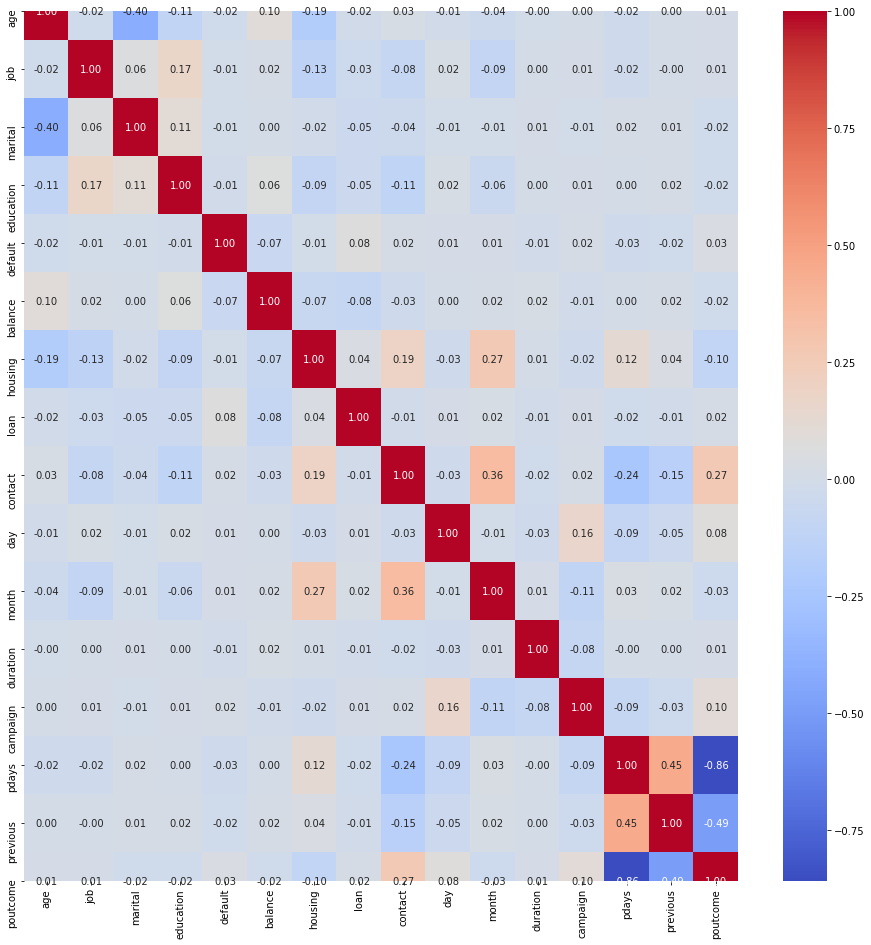

In [48]:
# Set the figure size
plt.figure(figsize=(16, 16))

correlation_matrix = X_train_scaled.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [49]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:#removing feature with absolute value above 0.4
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [50]:
corr_features_to_be_dropped = correlation(X_train_scaled, 0.4)
corr_features_to_be_dropped


{'marital', 'poutcome', 'previous'}

Observation

We can observe that the following columns show high collinearity

'marital' with 'age'
'poutcome', 'previous' with 'pdays'

In [52]:
#Thus dropping the columns with high collinearity
X_train_updated = X_train_scaled.drop(corr_features_to_be_dropped, axis=1)
X_train_updated.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays
0,0.519481,0.363636,0.666667,0.0,0.092259,1.0,0.0,1.0,0.133333,0.727273,0.053070,0.0,0.0
1,0.337662,0.818182,0.333333,0.0,0.073067,1.0,0.0,1.0,0.133333,0.727273,0.030704,0.0,0.0
2,0.194805,0.181818,0.333333,0.0,0.072822,1.0,1.0,1.0,0.133333,0.727273,0.015453,0.0,0.0
3,0.376623,0.090909,1.000000,0.0,0.086476,1.0,0.0,1.0,0.133333,0.727273,0.018707,0.0,0.0
4,0.194805,1.000000,1.000000,0.0,0.072812,0.0,0.0,1.0,0.133333,0.727273,0.040260,0.0,0.0


# Method 2. Chi2 Test
The chi-square test evaluates whether the observed distribution of a categorical feature is significantly different from what would be expected if the feature and the target variable were independent. 

In [54]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=10)

independent_features = list(X_train_updated.columns)

independent_vars = X_train_updated[independent_features]
dependent_var = y_train

fit = selector.fit(independent_vars, dependent_var)

mask = fit.get_support()
selected_features = X_train_updated[independent_features].columns[mask]

print("Selected Features:", selected_features)

Selected Features: Index(['job', 'education', 'default', 'housing', 'loan', 'contact', 'day',
       'duration', 'campaign', 'pdays'],
      dtype='object')


In [55]:
X_train_updated = X_train_updated[selected_features]
X_train_updated.head()

,job,education,default,housing,loan,contact,day,duration,campaign,pdays
0,0.363636,0.666667,0.0,1.0,0.0,1.0,0.133333,0.053070,0.0,0.0
1,0.818182,0.333333,0.0,1.0,0.0,1.0,0.133333,0.030704,0.0,0.0
2,0.181818,0.333333,0.0,1.0,1.0,1.0,0.133333,0.015453,0.0,0.0
3,0.090909,1.000000,0.0,1.0,0.0,1.0,0.133333,0.018707,0.0,0.0
4,1.000000,1.000000,0.0,0.0,0.0,1.0,0.133333,0.040260,0.0,0.0


# Method 3. Variance Threshold

In [56]:
X_train_info = X_train_updated.describe()

X_train_info.loc['std', :] = X_train_info.loc['std', :]**2
X_train_info

,job,education,default,housing,loan,contact,day,duration,campaign,pdays
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.394524,0.408271,0.018027,0.555838,0.160226,0.320121,0.493547,0.052494,0.028449,0.047245
std,0.088515,0.062167,0.017702,0.246888,0.134557,0.201579,0.076960,0.002742,0.002497,0.013185
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.090909,0.333333,0.000000,0.000000,0.000000,0.000000,0.233333,0.020943,0.000000,0.000000
50%,0.363636,0.333333,0.000000,1.000000,0.000000,0.000000,0.500000,0.036600,0.016129,0.000000
75%,0.636364,0.666667,0.000000,1.000000,0.000000,1.000000,0.666667,0.064864,0.032258,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0.003) #Removing both constant and quasi-constant
var_thr.fit(X_train_updated)

var_thr.get_support()


array([ True,  True,  True,  True,  True,  True,  True, False, False,
        True])

In [59]:
features_to_be_dropped = [column for column in X_train_updated.columns
          if column not in X_train_updated.columns[var_thr.get_support()]]

for features in features_to_be_dropped:
    print(features)

duration
campaign


# Dropping features with low variance - almost having same values

In [60]:
X_train_updated.drop(features_to_be_dropped, axis=1, inplace=True)

In [61]:
X_train_updated

,job,education,default,housing,loan,contact,day,pdays
0,0.363636,0.666667,0.0,1.0,0.0,1.0,0.133333,0.000000
1,0.818182,0.333333,0.0,1.0,0.0,1.0,0.133333,0.000000
2,0.181818,0.333333,0.0,1.0,1.0,1.0,0.133333,0.000000
3,0.090909,1.000000,0.0,1.0,0.0,1.0,0.133333,0.000000
4,1.000000,1.000000,0.0,0.0,0.0,1.0,0.133333,0.000000
...,...,...,...,...,...,...,...,...
45206,0.818182,0.666667,0.0,0.0,0.0,0.0,0.533333,0.000000
45207,0.454545,0.000000,0.0,0.0,0.0,0.0,0.533333,0.000000
45208,0.454545,0.333333,0.0,0.0,0.0,0.0,0.533333,0.212156
45209,0.090909,0.333333,0.0,0.0,0.0,0.5,0.533333,0.000000


In [62]:
#Final features that were extracted after applying 3 methods
X_train_updated.columns

Index(['job', 'education', 'default', 'housing', 'loan', 'contact', 'day',
       'pdays'],
      dtype='object')

In [63]:
#finding out which independent variable has missing data
X_train_updated.isnull().sum()

job          0
education    0
default      0
housing      0
loan         0
contact      0
day          0
pdays        0
dtype: int64

In [64]:
X_train_updated

,job,education,default,housing,loan,contact,day,pdays
0,0.363636,0.666667,0.0,1.0,0.0,1.0,0.133333,0.000000
1,0.818182,0.333333,0.0,1.0,0.0,1.0,0.133333,0.000000
2,0.181818,0.333333,0.0,1.0,1.0,1.0,0.133333,0.000000
3,0.090909,1.000000,0.0,1.0,0.0,1.0,0.133333,0.000000
4,1.000000,1.000000,0.0,0.0,0.0,1.0,0.133333,0.000000
...,...,...,...,...,...,...,...,...
45206,0.818182,0.666667,0.0,0.0,0.0,0.0,0.533333,0.000000
45207,0.454545,0.000000,0.0,0.0,0.0,0.0,0.533333,0.000000
45208,0.454545,0.333333,0.0,0.0,0.0,0.0,0.533333,0.212156
45209,0.090909,0.333333,0.0,0.0,0.0,0.5,0.533333,0.000000


# Step 4: Training models

# Model 1: Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
classifier1= LogisticRegression(random_state=0)
classifier1.fit(X_train_updated,y_train)

LogisticRegression(random_state=0)

In [66]:
y_pred=classifier1.predict(X_test_scaled[X_train_updated.columns])
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

[[39915     7]
 [ 5279    10]]


In [68]:
X_train_updated.value_counts()

job       education  default  housing  loan  contact  day       pdays   
0.363636  0.666667   0.0      0.0      0.0   0.0      0.900000  0.000000    148
                                                      0.600000  0.000000    133
                              1.0      0.0   0.0      0.566667  0.000000    125
                              0.0      0.0   0.0      0.666667  0.000000    124
                                                      0.566667  0.000000    117
                                                                           ... 
          0.333333   0.0      1.0      0.0   0.0      0.533333  0.294725      1
                                                                0.394495      1
                                                      0.566667  0.111239      1
                                                                0.118119      1
1.000000  1.000000   1.0      0.0      0.0   1.0      0.633333  0.000000      1
Length: 14381, dtype: int64

In [69]:
y_test.value_counts()

0    39922
1     5289
Name: y, dtype: int64

Dataset has a significant class imbalance (which is the case, as the distribution of y_test is 4000 instances of class 0 and 521 instances of class 1), Logistic Regression, being a linear model might struggle to predict the minority class.
In this case, it seems that the model has only made one positive prediction.

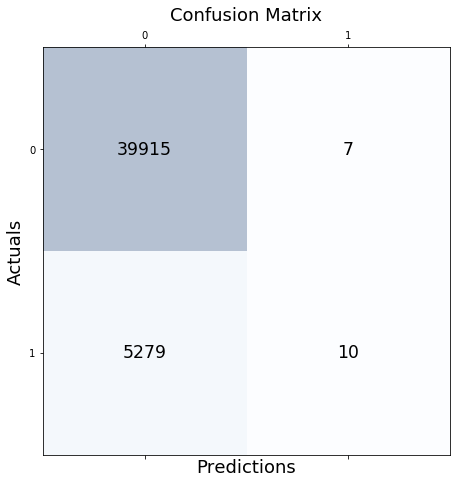

In [71]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        ax.text(x=j, y=i,s=cm1[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.metrics import classification_report

#y_test and y_pred are the true labels and predicted labels respectively

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", recall)
print("F1: ", f1)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     39922
           1       0.59      0.00      0.00      5289

    accuracy                           0.88     45211
   macro avg       0.74      0.50      0.47     45211
weighted avg       0.85      0.88      0.83     45211

Accuracy:  0.8830815509499901
Precision:  0.5882352941176471
Recall:  0.0018907165815844206
F1:  0.003769317753486619


# Model 2: Tree Classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train_updated, y_train)

DecisionTreeClassifier()

In [76]:
y_pred2 = dtc.predict(X_test_scaled[X_train_updated.columns])
y_pred2

array([0, 0, 0, ..., 1, 0, 0])

In [77]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[39832    90]
 [ 3040  2249]]


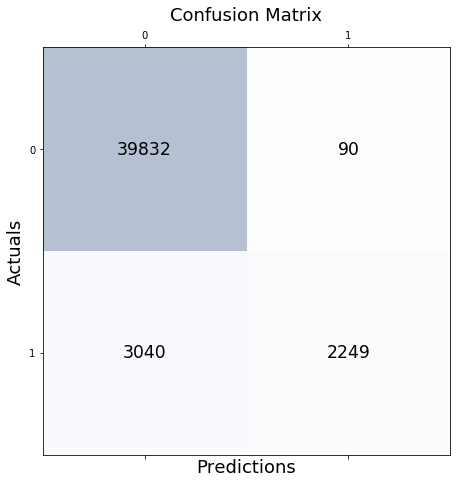

In [78]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm2, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm2.shape[0]):
    for j in range(cm2.shape[1]):
        ax.text(x=j, y=i,s=cm2[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#y_test and y_pred are the true labels and predicted labels respectively
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))

acc = accuracy_score(y_test, y_pred2)
prec = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", recall)
print("F1: ", f1)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     39922
           1       0.96      0.43      0.59      5289

    accuracy                           0.93     45211
   macro avg       0.95      0.71      0.78     45211
weighted avg       0.93      0.93      0.92     45211

Accuracy:  0.9307690606268386
Precision:  0.9615220179563916
Recall:  0.42522215919833617
F1:  0.5896696381751442


# Model 3: RandomForestClassifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

# Create the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Fit the model to the data
rf_classifier.fit(X_train_updated, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test_scaled[X_train_updated.columns])

In [83]:
# Evaluate the model
acc_best = accuracy_score(y_test, y_pred_rf)
prec_best = precision_score(y_test, y_pred_rf)
recall_best = recall_score(y_test, y_pred_rf)
f1_best = f1_score(y_test, y_pred_rf)


print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


print("Best Accuracy: ", acc_best)
print("Best Precision: ", prec_best)
print("Best Recall: ", recall_best)
print("Best F1: ", f1_best)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     39922
           1       0.93      0.44      0.60      5289

    accuracy                           0.93     45211
   macro avg       0.93      0.72      0.78     45211
weighted avg       0.93      0.93      0.92     45211

Best Accuracy:  0.9307690606268386
Best Precision:  0.9305943358595932
Best Recall:  0.4411041784836453
Best F1:  0.5985120574653668


Decision Tree classifier achieves highest precision.It is suitable for prediction